In [256]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, multinomial,geom, moment
from decimal import Decimal, getcontext
from tqdm import tqdm
import math
from scipy.special import comb
import seaborn as sns


In [257]:
sns.set()

### IDs:
Insert yours IDs to the cell below

**ID** #1:207166968

ID #2:208845842


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

# **1.A Answer**

P(Defective) = 0.03 → P(Not-Defective) = 0.97

P(Not-Defective n times) = 0.97ⁿ

P(Defective At Least Once / n times ) = 1 - P(Not-Defective n times) = 1 - 0.97ⁿ

Objective: at least 85% probability of having one defective sample, Therefore:


1 - 0.97ⁿ < 0.85

0.97ⁿ > 0.15

$
n > \frac{log(0.15)}{log(0.97)} = 62.28
$

Samples are integers, Therefore: $ n = \lceil(62.28)\rceil $

Concolusion: at least 63 samples are required in order to have  85% probability of having at least one defective product in the batch sent.





In [258]:

def question_1_a(p_defective: float, p_threshold: float) -> int:
  n = np.log(1 - p_threshold) / np.log(1-p_defective)
  return int(np.ceil(n))

question_1_a(0.03, 0.85)

63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

# **1.B Answer**

P(Defective) = 0.04 → P(Not-Defective) = 0.96

P(Not-Defective n times) = 0.96ⁿ

P(Defective At Least Once / n times ) = 1 - P(Not-Defective n times) = 1 - 0.96ⁿ

Objective: at least 95% probability of having one defective sample, Therefore:


1 - 0.96ⁿ < 0.95

0.96ⁿ > 0.05

$
n > \frac{log(0.05)}{log(0.96)} = 73.38
$

Samples are integers, Therefore: $ n = \lceil(73.38)\rceil $

Concolusion: at least 74 samples are required in order to have  95% probability of having at least one defective product in the batch sent.

In [259]:
def question_1_b(p_defective: float, p_threshold: float) -> int:
  return question_1_a(p_defective, p_threshold)

question_1_a(0.04, 0.95)


74

#### 1.C

Consider the following cases and calculate how many independent samples are required:

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [260]:
def question_1_c(p_defective: float, p_threshold: float, min_defective: int) -> int:
  for n in range(1, 1000):
    rv = binom(n, p_defective)
    x_5_defectives_and_up = 1 - rv.cdf(min_defective - 1)
    if x_5_defectives_and_up > p_threshold:
      return n

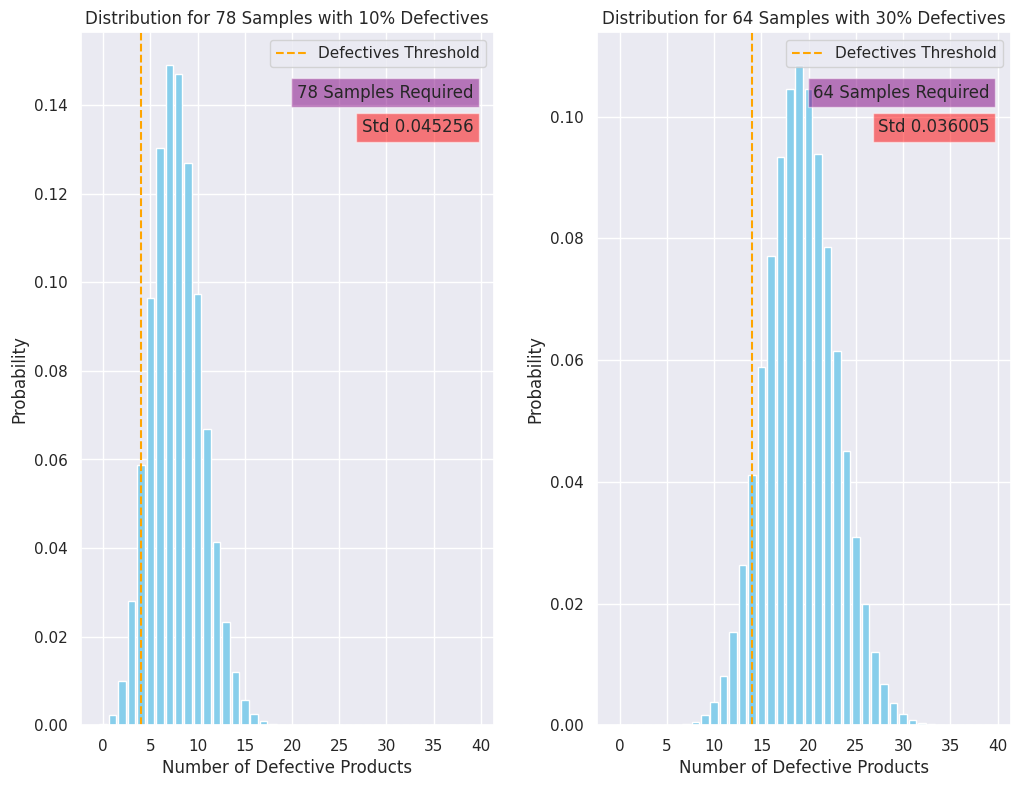

In [261]:
def plot_distribution(n, p_defective, min_defective, title, axes):
    rv = binom(n, p_defective)
    x = np.arange(0, 40)
    pmf = rv.pmf(x)
    axes.bar(x, pmf, color='skyblue')
    axes.axvline(x=min_defective-1, color='orange', linestyle='--', label='Defectives Threshold')
    axes.set_xlabel('Number of Defective Products')
    axes.set_ylabel('Probability')
    axes.set_title(title)
    axes.text(0.95, 0.9, f"{n} Samples Required", bbox=dict(facecolor='purple', alpha=0.5), horizontalalignment='right',
     verticalalignment='bottom', transform=axes.transAxes)
    axes.text(0.95, 0.85, f"Std {round(np.std(pmf), 6)}", bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='right',
     verticalalignment='bottom', transform=axes.transAxes)
    axes.legend()

# Plot the distributions for both cases
fig, axes = plt.subplots(1, 2, figsize=(12, 9))
fig.subplots_adjust(wspace=0.25)

c_1_1 = question_1_c(0.1, 0.9, 5)
c_1_2 = question_1_c(0.3, 0.9, 15)

plot_distribution(c_1_1, 0.1, 5, f'Distribution for {c_1_1} Samples with 10% Defectives', axes[0])
plot_distribution(c_1_2, 0.3, 15, f'Distribution for {c_1_2} Samples with 30% Defectives', axes[1])

## **Answer 1.C**
Sample Size Requirement: To achieve a 90% probability of detecting a minimum number of defective products, 78 samples are needed when the defect rate is 10%, while only 64 samples are required for a 30% defect rate.

Impact of Defect Probability: A lower defect probability (10%) necessitates a larger sample size to ensure a high chance of finding the minimum number of defective items, due to the lower likelihood of defects in each sample.

Influence of Minimum Defect Threshold: Despite the second scenario demanding more defective items (15 vs. 5), the higher defect rate (30%) increases the chance of finding defects, thus requiring fewer samples to reach the desired confidence level.

Visualizations: Graphs illustrate that with a 10% defect rate, the probability distribution is wider and has a higher variance/std, indicating the need for more samples. On the other hand, for a 30% defect rate, the distribution is narrow with with lower variance/std, allowing for fewer samples to achieve the goal.

The required sample size to achieve a certain confidence level in detecting defective products depends on the defect probability and the minimum number of defects needed. Higher defect rates result in smaller variance, therefore smaller sample sizes are required to meet higher defect thresholds with the same level of confidence.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br>

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.
Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

# **Scenario 1**
**Normal Distributions**

In this scenario, we generated a gaussian distribution around the median 4600: $P$~$Gaussian(\mu=4600, \sigma =100, n=16,000)$

For Stochastic Heights, in order to to obtain a mean of 6300, we  scaled some samples by a factor $S$.

The smallest 13,000 samples remained unscaled, and the largest 3,000 samples  were scaled by $S$

Formally:

$\frac{\sum_{i=0}^{13000}x_i+S⋅\sum_{i=13000}^{16000}x_i}{N}=mean$

$S = \frac{mean⋅N - \sum_{i=0}^{13000}x_i}{\sum_{i=13000}^{16000}x_i}$

For Random Groves, a different approach was taken.

We again generated a gaussian distribution around the median: $P$~$Gaussian(\mu=4600, σ=100, n=22,000)$.

Then, the difference betweem the current mean and the target mean calculated, denoted by 'diff':

$Diff = \lvert Median - TargetMean \rvert$

The smallest or largest 50% samples were translated accordingly:

$Samples += 2 \cdot diff$

As a result, the median remained the same, while the mean was changed to the desired target mean.

This process was repeated a second time with a uniform distribution $P$ ~ $Uni(0, 2\cdot median )$, and a third time for laplacian distribution $P$~$Lap(\mu=4600, \sigma=100)$. The same logic is consistent, since all of these distributions are symetric.

In [262]:
median_rent = 4600

In [263]:
# Utility Methods
def fix_median(rents, median_rent: float):
  median_delta = median_rent - np.median(rents)
  rents += median_delta
  return rents


def fix_mean(rents, mean_rent: float, n: int):
    mean_delta = mean_rent - np.mean(rents)
    if mean_delta > 0:
      rents[n-3000:] += n * mean_delta / 3000
    else:
      rents[:3000] += n * mean_delta /3000
    return rents


In [264]:
def stochastic_heights(rents: np.array, n: int, mean_rent: float, median_rent: int, axes, dist_name, display_variance=False):
  rents.sort()

  scale = (mean_rent * n - sum(rents[:n-3000]) ) / sum(rents[n-3000:])
  rents[n-3000:] *= scale

  rents = fix_median(rents, median_rent)
  rents = fix_mean(rents, mean_rent, n)

  Q1_median = np.median(rents[:n//2])
  Q3_median = np.median(rents[n//2:])
  IQR = Q3_median-Q1_median
  IQR = round(IQR, 3)
  median = round(np.median(rents), 3)
  mean = round(rents.mean(), 3)

  boxplot = sns.boxplot(rents, orient="h", ax=axes[0, 0])
  boxplot.set_title(f"IQR={IQR}")
  histplot = sns.histplot(rents, bins=1000, ax=axes[1, 0]);
  histplot.set_xlabel("Salary")
  histplot.set_ylabel("Population")
  histplot.set_title(f"Stochastic Heights\nSplitted {dist_name}")
  if display_variance:
    variance = round(np.var(rents), 6)
    axes[1, 0].text(0.1, 0.9, f"Variance {variance}", bbox=dict(facecolor='purple', alpha=0.5), horizontalalignment='left', fontsize="11",
      verticalalignment='bottom', transform=axes[1,0].transAxes)
  axes[1, 0].axvline(mean, color='purple', linestyle='--', label=f'Mean {mean}')
  axes[1, 0].axvline(median, color='yellow', linestyle='--', label=f'Median {median}')
  if display_variance:
    return variance

In [265]:
def random_groves(rents: np.array, n: int, mean_rent: int, median_rent: int, axes, dist_name, display_variance=False):
  rents.sort()

  diff = mean_rent - median_rent
  if diff > 0:
    rents[n // 2 + 1:] += diff * 2
  else:
    rents[0 : n // 2 - 1] += diff * 2

  rents = fix_median(rents, median_rent)
  rents = fix_mean(rents, mean_rent, n)

  Q1_median = np.median(rents[:n//2])
  Q3_median = np.median(rents[n//2:])
  IQR = Q3_median-Q1_median
  IQR = round(IQR, 3)
  median = round(np.median(rents), 3)
  mean = round(rents.mean(), 3)

  boxplot = sns.boxplot(rents, orient="h", ax=axes[0, 1])
  boxplot.set_title(f"IQR={IQR}")

  histplot = sns.histplot(rents, bins=100, ax=axes[1, 1]);
  histplot.set_xlabel("Salary")
  histplot.set_ylabel("Population")
  histplot.set_title(f"Random Groves\nSplitted {dist_name}")
  if display_variance:
    variance = round(np.var(rents), 6)
    axes[1, 1].text(0.1, 0.9, f"Variance {variance}", bbox=dict(facecolor='purple', alpha=0.5), horizontalalignment='left', fontsize="11",
      verticalalignment='bottom', transform=axes[1,1].transAxes)
  axes[1, 1].axvline(mean, color='purple', linestyle='--', label=f'Mean {mean}')
  axes[1, 1].axvline(median, color='yellow', linestyle='--', label=f'Median {median}')
  if display_variance:
    return variance

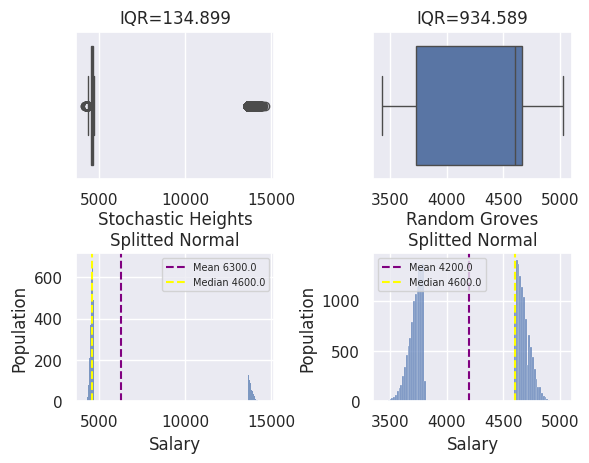

In [266]:
def stochastic_heights_normal(axes):
  n = 16000
  mean_rent = 6300
  rents = np.random.normal(loc=median_rent, scale=100, size=n)
  stochastic_heights(rents, n, mean_rent, median_rent, axes, "Normal")

def random_groves_normal(axes):
  n = 22000
  mean_rent = 4200
  rents = np.random.normal(loc=median_rent, scale=100, size=n)

  random_groves(rents, n, mean_rent, median_rent, axes, "Normal")

fig, axes = plt.subplots(2, 2)
stochastic_heights_normal(axes)
random_groves_normal(axes)

axes[1, 0].legend(fontsize='7')
axes[1, 1].legend(fontsize='7')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

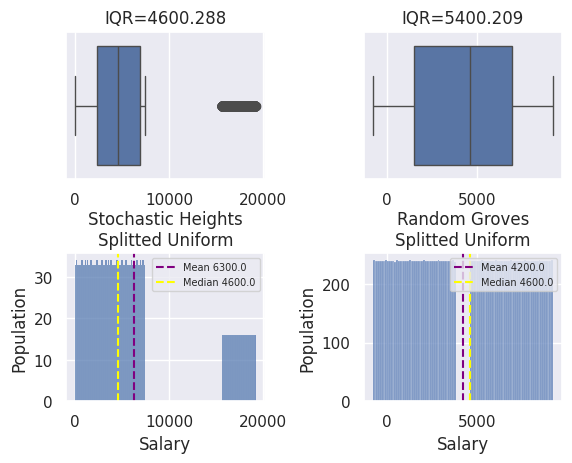

In [267]:
def stochastic_heights_uniform(axes):
  n = 16000
  mean_rent = 6300
  rents = np.linspace(0, median_rent*2, n)
  stochastic_heights(rents, n, mean_rent, median_rent, axes, "Uniform")


def random_groves_uniform(axes):
  n = 22000
  mean_rent = 4200
  rents = np.linspace(0, median_rent*2, n)
  random_groves(rents, n, mean_rent, median_rent, axes, "Uniform")

fig, axes = plt.subplots(2, 2)
random_groves_uniform(axes)
stochastic_heights_uniform(axes)

axes[1, 0].legend(fontsize='7')
axes[1, 1].legend(fontsize='7')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

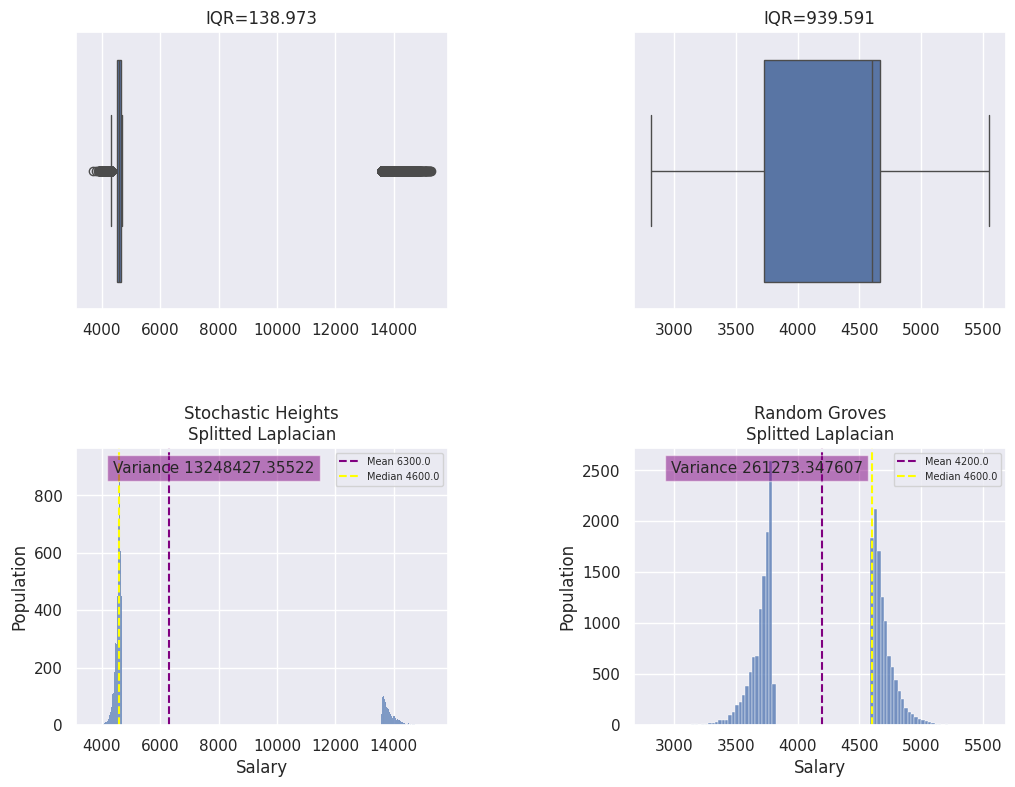

In [268]:
def stochastic_heights_laplace(axes):
  n = 16000
  mean_rent = 6300
  rents = np.random.laplace(loc=median_rent, scale=100, size=n)
  return stochastic_heights(rents, n, mean_rent, median_rent, axes, "Laplacian", display_variance=True)

def random_groves_laplace(axes):
  n = 22000
  mean_rent = 4200
  rents = np.random.laplace(loc=median_rent, scale=100, size=n)
  return random_groves(rents, n, mean_rent, median_rent, axes, "Laplacian", display_variance=True)

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
sh_var = stochastic_heights_laplace(axes)
rg_var = random_groves_laplace(axes)

axes[1, 0].legend(fontsize='7')
axes[1, 1].legend(fontsize='7')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

## **Answer 2.B**
As required, in the third scenario the variance of Stochastic Heights is larger than the variance of Random Groves.

**Stds (Instead of variances) are displayed for better visualizations.**

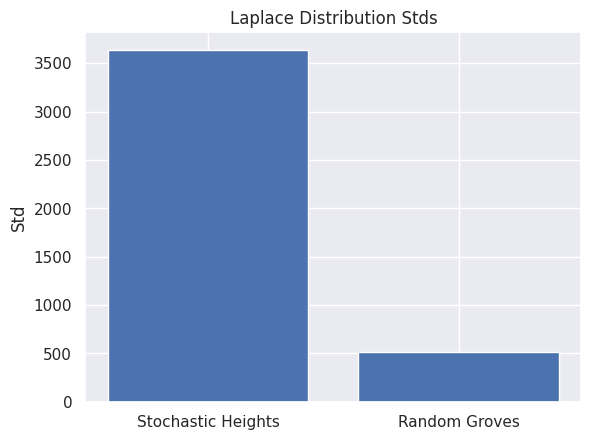

In [269]:
plt.bar(["Stochastic Heights", "Random Groves"], [np.sqrt(sh_var), np.sqrt(rg_var)])
plt.ylabel("Std")
plt.title("Laplace Distribution Stds")
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that $X$ is a vector of counts.


2. Consider the random variable $Y = X_2 + X_3 + X_4$.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to results from class and explain your observation.

# **Question 3 - Answer**

**Step 1**: Setups

Variables Initialization

$k = 100, n = 20, p=[0.2, 0.1, 0.1, 0.1, 0.2, 0.3]$

**Step 2**: Experiment & Trials
- Conduct 100 experiments of 20 trials, given the probability vector p
- Calculate $Y = X_2 + X_3 + X_4$

**Step 3**: Calculate the centralized empirical third moment by definition as learned in class

$\mathbb{E}((Y-\mu(Y))^3)$

In [270]:
def question_3():
  # Step 1: Setup
  k = 100
  n = 20
  p = [0.2, 0.1, 0.1, 0.1, 0.2, 0.3]

  #Step 2: Random Variables
  xs = multinomial.rvs(n, p, k)
  ys = xs[:, 1:4]
  ys = np.sum(ys, axis=1)

  #Step 3: Calculate the empirical centralized third moment
  mean_y = np.mean(ys)
  y_minus_mean = (ys - mean_y) ** 3
  empirical_centralized_third_moment = y_minus_mean.mean()
  return empirical_centralized_third_moment


# **Answer 3.4**
As learned in class, the third central moment can be calculated using the following equation:

$np\cdot(1-p)\cdot(1-2p)$

As expected, the more trials & experiments conducted, the empirical centralized third moment converges to the theoretical equation's result.

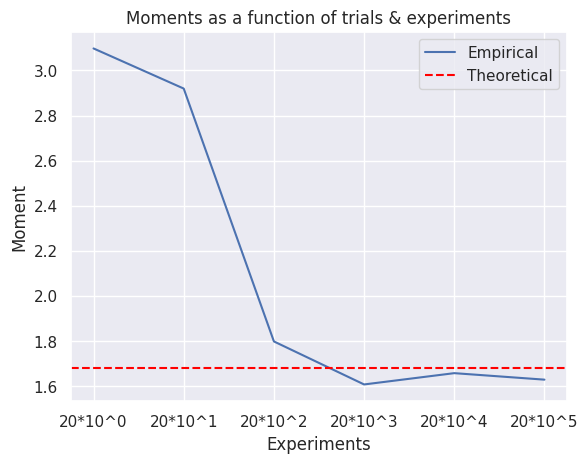

In [289]:
p = 0.3
n = 20
theoretical_third_moment = n * p * (1 - p) * (1 - 2*p)

moments = []
for i in range(6):
  moments.append([])
  for j in range(10 ** i):
    moments[i].append(question_3())

moment_means = [np.mean(moments[i]) for i in range(len(moments))]
plt.plot([f"20*10^{i}" for i in range(len(moments))],moment_means, label="Empirical")
plt.title("Moments as a function of trials & experiments")
plt.xlabel("Experiments")
plt.ylabel("Moment")
plt.axhline(y=theoretical_third_moment, color='red', linestyle='--', label='Theoretical')
plt.legend()

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [272]:
def convolve(distribution_1: np.array, distribution_2: np.array):
    """Convolve two distributions."""
    result = {}
    padding_size = len(distribution_2) - 1
    v1 = np.pad(distribution_1, padding_size)
    v2 = np.flip(distribution_2)
    output_size = len(v1) - len(distribution_2) + 1
    Q = np.zeros(output_size)
    for i in range(output_size):
      Q[i] = np.sum(v1[i : i + len(distribution_2)] * v2)

    return Q


def NFoldConv(P, n):
    """Compute the n-fold convolution of distribution P."""
    Q = P
    for i in range(n):
        Q = convolve(Q, P)
    return Q

def question_4_a_example():
  n = 3
  P = [1, 2, 3]
  Q = NFoldConv(P, 2)
  print(Q)

question_4_a_example()

[ 1.  6. 21. 44. 63. 54. 27.]


#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 independent times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [273]:
# Defining the distribution of a fair octahedron (8-sided die)
P_octahedron = [ 1/8 for i in range(1, 9)]

# Number of rolls
n_rolls = 17

# Compute the distribution
Q = NFoldConv(P_octahedron, n_rolls)

print(Q)


[5.55111512e-17 9.99200722e-16 9.49240686e-15 6.32827124e-14
 3.32234240e-13 1.46183066e-12 5.60368418e-12 1.92126315e-11
 6.00384742e-11 1.73429382e-10 4.68137029e-10 1.19091736e-09
 2.87482288e-09 6.62169419e-09 1.46197209e-08 3.10580921e-08
 6.36898819e-08 1.26419268e-07 2.43457514e-07 4.55809600e-07
 8.31121704e-07 1.47823393e-06 2.56812778e-06 4.36330548e-06
 7.25794450e-06 1.18313724e-05 1.89174256e-05 2.96919977e-05
 4.57804440e-05 6.93853982e-05 1.03433890e-04 1.51740388e-04
 2.19179567e-04 3.11859254e-04 4.37280422e-04 6.04467450e-04
 8.24048642e-04 1.10826458e-03 1.47088084e-03 1.92698248e-03
 2.49263067e-03 3.18436783e-03 4.01856586e-03 5.01062321e-03
 6.17402956e-03 7.51933112e-03 9.05304433e-03 1.07765785e-02
 1.26852394e-02 1.47673908e-02 1.70038547e-02 1.93676217e-02
 2.18239359e-02 2.43307953e-02 2.68398879e-02 2.92979520e-02
 3.16485217e-02 3.38339851e-02 3.57978558e-02 3.74871387e-02
 3.88546534e-02 3.98611777e-02 4.04772773e-02 4.06847045e-02
 4.04772773e-02 3.986117

### Question 5 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 5.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

Text(0, 0.5, 'Probability')

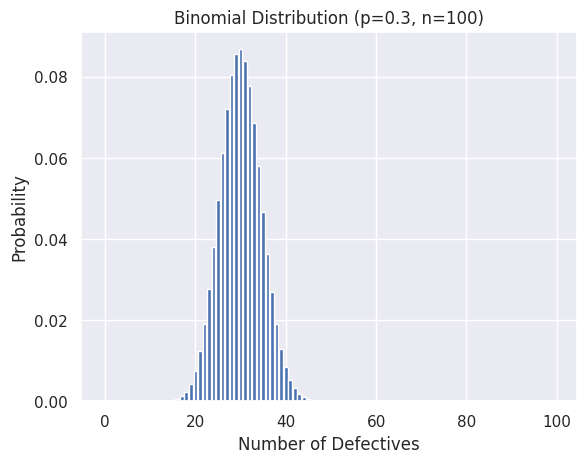

In [274]:
n = 100
p = 0.3
x = np.arange(0, n)
pmf = binom.pmf(x, n, p)
plt.bar(x, pmf)

plt.title(f'Binomial Distribution (p={p}, n={n})')
plt.xlabel('Number of Defectives')
plt.ylabel('Probability')


#### 5.B
State a formula for computing $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

# **Question 5.B - Answer**

C(ω) counts the number of sequences in $\Omega$ that have the same number of 1s as (ω). for given W(ω) = k, then C(ω) is the number pf sequences with exactly k 1s.
Since each sequence (ω) with k 1s has the same C(ω), then C(ω) = $\binom{n}{W(ω)}$

**Formוla for E(C):**

$\mathbb{E}(C) = \sum_{k=0}^{n}$ $\binom{n}{k}$ P(W(ω) = k)

Since P(W(ω) = k) = $\binom{n}{k}$ $p^k$ $(1-p)^{n-k}$

In [275]:
def Expectancy(n,p):
  expec_c = 0

  for i in range(n+1):
    expec_c += math.comb(n,i) * binom.pmf(i, n, p)

  return expec_c


In [276]:
p_array = [0.1,0.5,0.8]
n_array = [10,20,50,100]

for p in p_array:
  for n in n_array:
    print(f"Expectancy of n={n}, p={p}",Expectancy(n,p))

Expectancy of n=10, p=0.1 22.575959534800003
Expectancy of n=20, p=0.1 1757.7458477658747
Expectancy of n=50, p=0.1 1479309659.773232
Expectancy of n=100, p=0.1 1.6815694309212332e+19
Expectancy of n=10, p=0.5 180.42578124999997
Expectancy of n=20, p=0.5 131460.69414138794
Expectancy of n=50, p=0.5 89609514959899.98
Expectancy of n=100, p=0.5 7.143018323803166e+28
Expectancy of n=10, p=0.8 66.95000811519992
Expectancy of n=20, p=0.8 16979.43212422518
Expectancy of n=50, p=0.8 490151964857.8023
Expectancy of n=100, p=0.8 2.0130081915279001e+24


#### 5.C
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$.

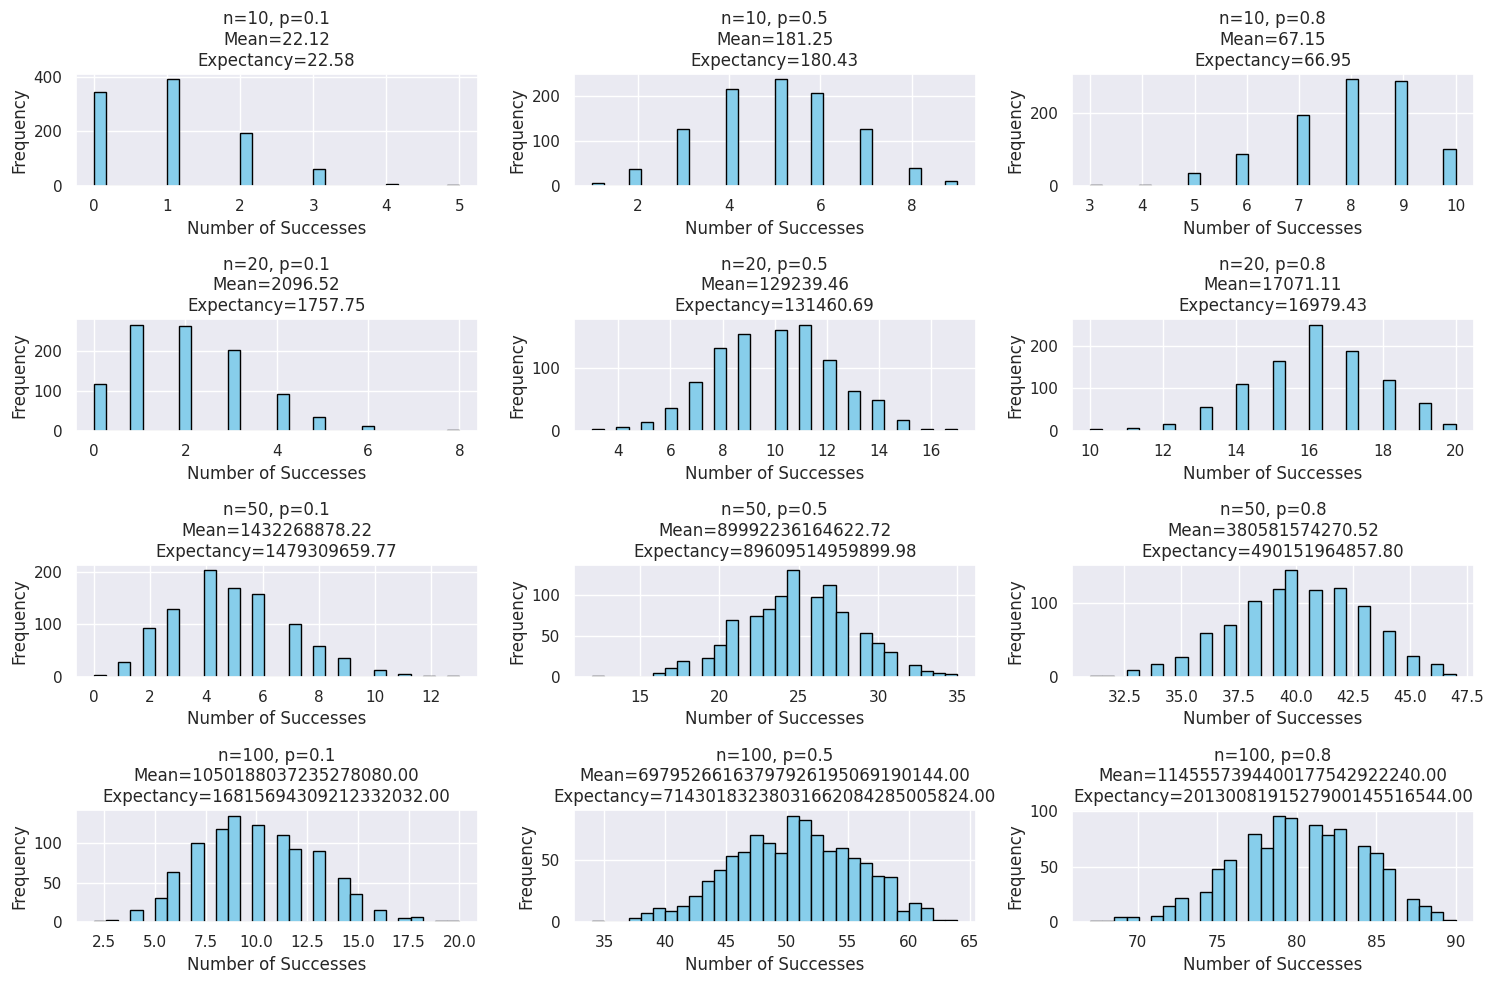

In [277]:
samples_size = 1000
d = {}
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

for i, n in enumerate(n_array):
  for j, p in enumerate(p_array):
    samples = np.random.binomial(n, p, samples_size)
    c_array = comb(n, samples)
    mean = np.mean(c_array)
    expectancy = Expectancy(n, p)
    d[mean] = expectancy
    # Plotting the histogram of samples
    axs[i, j].hist(samples, bins=30, color='skyblue', edgecolor='black')
    axs[i, j].set_xlabel("Number of Successes")
    axs[i, j].set_ylabel("Frequency")
    axs[i, j].set_title(f"n={n}, p={p}\nMean={mean:.2f}\nExpectancy={expectancy:.2f}")

plt.tight_layout()
plt.show()

#### 5.D
Use a scatter plot to compare the empirical and the computed values from the previous section.

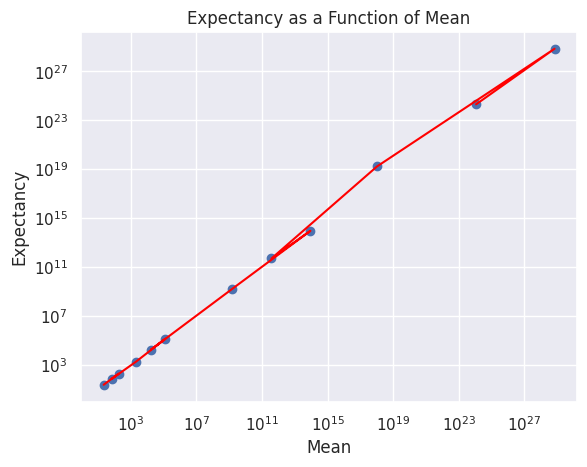

In [278]:

plt.scatter(d.keys(), d.values())
plt.plot(list(d.keys()), list(d.values()), linestyle='-', color='red')
plt.xlabel("Mean")
plt.ylabel("Expectancy")
plt.title("Expectancy as a Function of Mean")
plt.xscale('log')
plt.yscale('log')

### Question 6 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 6.A
Write code to compute the exact value of $E(T_{N})$

In [279]:
def calc_expectancy(n: int, i: int):
  return n / (n - i + 1)

def calc_T_n_expectancy(n: int):
  expectancy = 0
  for i in range(1, n + 1):
    expectancy += calc_expectancy(n, i)
  return expectancy

In [280]:
calc_T_n_expectancy(4)

8.333333333333332

#### 6.B
Write code to compute the exact value of $V(T_{N})$

In [281]:
def calc_variance(n):
  harmonic = [1 / i for i in range(1, n + 1)]
  harmonic_squared = [1 / i**2 for i in range(1, n + 1)]
  variance = n **2 * sum(harmonic_squared) - n * sum(harmonic)
  return variance

In [282]:
calc_variance(5)

25.173611111111114

#### 6.C
Write code to exactly compute $P(T_{30}>60)$

# **Question 6.c - Answer**
This function calculates the probability of collecting exactly n distinct coupons in k trials out of N total coupon types. It uses memoization (memo dictionary) to store and reuse results for subproblems, optimizing performance by avoiding redundant calculations.

For n > 1 and k≥n, the function iterates over possible values of i (from 1 to k−1) to calculate the probability of getting a new coupon type at the
i-th trial and then recursively calculates the probability of having n−1 distinct coupons in the remaining k−i trials. The geometric probability (p_geom) represents the chance of getting the next new coupon type exactly on the i-th trial.

In [283]:

getcontext().prec = 100

def recursive_probability(k, n, N, memo) -> float:
    if k < n:
        return Decimal(0)

    if n == 1:
        return Decimal(geom.pmf(k, 1))

    if (n, k) in memo:
        return memo[(n, k)]

    prob = Decimal(0)

    for i in range(1, k):
        p_geom = Decimal(geom.pmf(i, (N - (n - 1)) / N))
        prob += p_geom * recursive_probability(n - 1, k - i, N, memo)

    memo[(n, k)] = prob
    return prob

def distinct_coupons_exactly_witinig_time(N,k):
  memo = {}
  n = N
  probability_sum = 0
  for i in range(n, k+1):
      probability_sum += recursive_probability(i, n, N,memo)
  return Decimal(Decimal(1)-probability_sum)

k = 60
N = 30
print(distinct_coupons_exactly_witinig_time(N,k))

0.9978007678171828744262211522812119373072654027851108238027475778618558387614831841749541295717596100


#### 6.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Compute $E(S_{60})$ - the expected value of the time it will take to observe $N/2=60/2=30$ from the total of $N=60$ coupon types

In [284]:
def calc_expectancy(n: int, i: int):
  return n / (n - i + 1)

def calc_T_n_expectancy(n: int):
  expectancy = 0
  for i in range(1, n//2 + 1):
    expectancy += calc_expectancy(n, i)
  return expectancy


calc_T_n_expectancy(60)

41.092996921880804

#### 6.E
Write code to exactly compute $P(S_{60}>60)$

In [285]:

getcontext().prec = 100

def recursive_probability(n, k, N, memo) -> float:
    if k < n:
        return Decimal(0)

    if n == 1:
        return Decimal(geom.pmf(k, 1))

    if (n, k) in memo:
        return memo[(n, k)]

    prob = Decimal(0)

    for i in range(1, k):
        p_geom = Decimal(geom.pmf(i, (N - (n - 1)) / N))
        prob += p_geom * recursive_probability(n - 1, k - i, N, memo)

    memo[(n, k)] = prob
    return prob

def distinct_coupons_exactly_witinig_time(N,k):
  memo = {}
  n = N//2
  probability_sum = 0
  for i in range(n, k+1):
      probability_sum += recursive_probability(n, i,  N,memo)
  return Decimal(Decimal(1)-probability_sum)

k = 60
N = 60
print(distinct_coupons_exactly_witinig_time(N,k))

0.0001721650647358384150267515372869236475058916722023440237619703785460463079064111232201208430775129
